In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

/home/apk/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
eeg=h5py.File('ME_14_a_AA2018.10.08_11.56.02.hdf5',mode='r')
keys2= list(eeg.keys())
print keys2
keys1= list(eeg[keys2[0]].keys())
print keys1
#print eeg[keys2[0]][keys1[0]]
#eeg["RawData"]['Samples']
print list(eeg['RawData'].keys())
print eeg['RawData']['Samples'].shape[0]
sampletime = np.array(eeg['AsynchronData']["Time"])
time=sampletime/256.0
sampletime1=np.delete(sampletime, len(sampletime)-1)
#sampletime1=np.delete(sampletime1, len(sampletime1)-1)
#sampletime1=sampletime
sampletime1=np.delete(sampletime1, 0)
#sampletime1=np.delete(sampletime1, 0)
print sampletime
print sampletime1
print list(eeg['RawData']['DAQDeviceCapabilities'])

[u'AsynchronData', u'RawData', u'SavedFeatues', u'Version']
[u'AsynchronSignalTypes', u'Time', u'TypeID', u'Value']
[u'AcquisitionTaskDescription', u'DAQDeviceCapabilities', u'DAQDeviceDescription', u'Samples', u'SessionDescription', u'SubjectDescription']
12430
[[  496]
 [ 1406]
 [ 4641]
 [ 7021]
 [ 8691]
 [10306]
 [11811]]
[ 1406  4641  7021  8691 10306]
['<?xml version="1.0" encoding="utf-8" ?>\n<DAQDeviceCapabilities xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">\n  <AnalogChannelProperties>\n    <ChannelProperties>\n      <SensitivityLowValue>-250000</SensitivityLowValue>\n      <SensitivityHighValue>250000</SensitivityHighValue>\n      <SampleRate>256</SampleRate>\n      <Offset>0</Offset>\n      <NotchFilter>50</NotchFilter>\n      <HighpassFilter>0.1</HighpassFilter>\n      <LowpassFilter>60</LowpassFilter>\n      <IsBipolar>true</IsBipolar>\n      <IsTriggerChannel>false</IsTriggerChannel>\n      <DeviceNumber>1</DeviceNumbe

In [5]:
samples=np.array(eeg['RawData']['Samples'])
samples=samples.T
f1=samples[10]
fz=samples[11]
f2=samples[12]
c1=samples[28]
cz=samples[29]
p1=samples[46]
pz=samples[47]
p2=samples[48]
channels=[]
channels.append(f1)
channels.append(fz)
channels.append(f2)
channels.append(c1)
channels.append(cz)
channels.append(p1)
channels.append(pz)
channels.append(p2)

In [6]:
fchannels=[]
for i in range(0, len(channels)):
    c=[]
    for  j in sampletime1:
        c.append(channels[i][j-3*256:j+6*256])
    fchannels.append(c)
    
print len(fchannels)
print len(fchannels[0])
print len(fchannels[0][0])
print len(channels)

8
5
2304
8


In [7]:
import scipy.signal as signal
def butter_bandpass(lowcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    
    b, a = signal.butter(order, low, btype='low')
    return b, a

In [8]:
filtered=fchannels
freq=2
fs=256
order=8
for i in range (0, len(fchannels)):
    for j in range(0, len(fchannels[i])):
        b, a= butter_bandpass(freq, fs, order)
        x=(signal.filtfilt(b, a, fchannels[i][j], padlen=0))
        #x=x*1.0/np.max(x)
        filtered[i][j]=x

In [159]:
#print filtered[1][0]

In [160]:
#for i in range (0, len(filtered[0][0])):
 #   print filtered[1][0][i]

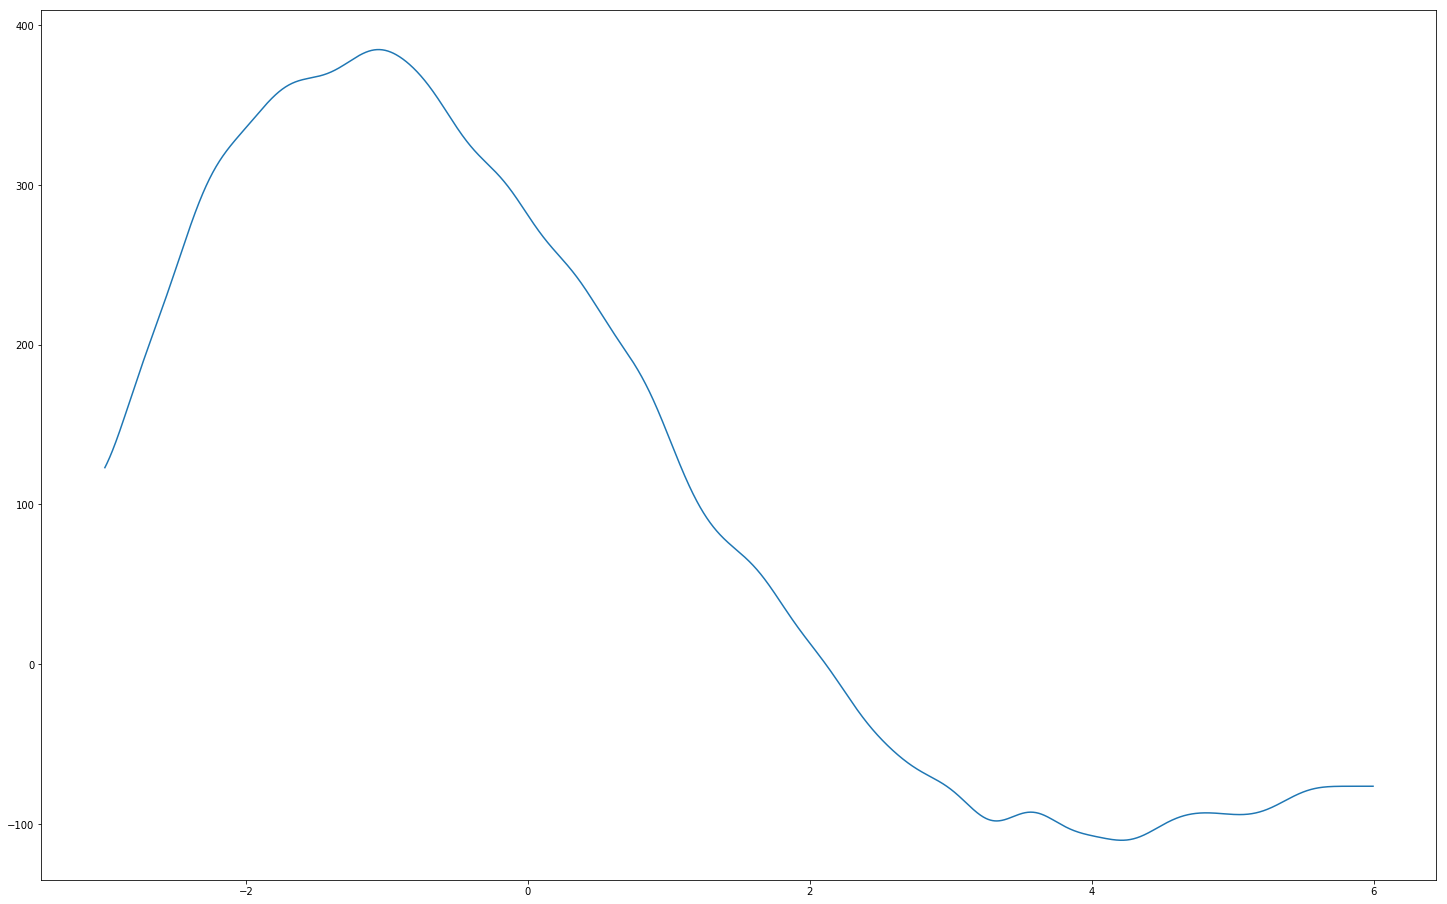

In [9]:
plt.rcParams["figure.figsize"] = [25,16]
plt.plot(np.arange(-3.0, 6.0, 1/256.0), filtered[2][1])

In [162]:
#j=1
#plt.rcParams["figure.figsize"] = [25,16]
#fig = plt.figure()
#plot=fig.add_subplot(3,3,1)
#plt.plot(np.arange(-3.0, 6.0, 1/256.0), filtered[0][j])
#plt.title('Channel F1')

#plot=fig.add_subplot(3,3,2)
#plt.plot(np.arange(-3.0, 6.0, 1/256.0), filtered[1][j])
#plt.title('Channel Fz')

#plot=fig.add_subplot(3,3,3)
#plt.plot(np.arange(-3.0, 6.0, 1/256.0), filtered[2][j])
#plt.title('Channel F2')

#plot=fig.add_subplot(3,3,4)
#plt.plot(np.arange(-3.0, 6.0, 1/256.0), filtered[3][j])
#plt.title('Channel C1')


#plot=fig.add_subplot(3,3,5)
#plt.plot(np.arange(-3.0, 6.0, 1/256.0), filtered[4][j])
#plt.title('Channel Cz')

#plot=fig.add_subplot(3,3,6)
#plt.plot(np.arange(-3.0, 6.0, 1/256.0), filtered[5][j])
#plt.title('Channel P1')

#plot=fig.add_subplot(3,3,7)
#plt.plot(np.arange(-3.0, 6.0, 1/256.0), filtered[6][j])
#plt.title('Channel Pz')

#plot=fig.add_subplot(3,3,8)
#plt.plot(np.arange(-3.0, 6.0, 1/256.0), filtered[7][j])
#plt.title('Channel P2')

#plt.tight_layout()
#plt.savefig('id6Day1-20190503T170539Z-001/111.png')
#plt.show()

In [395]:
path='id6Day1-20190503T170539Z-001'

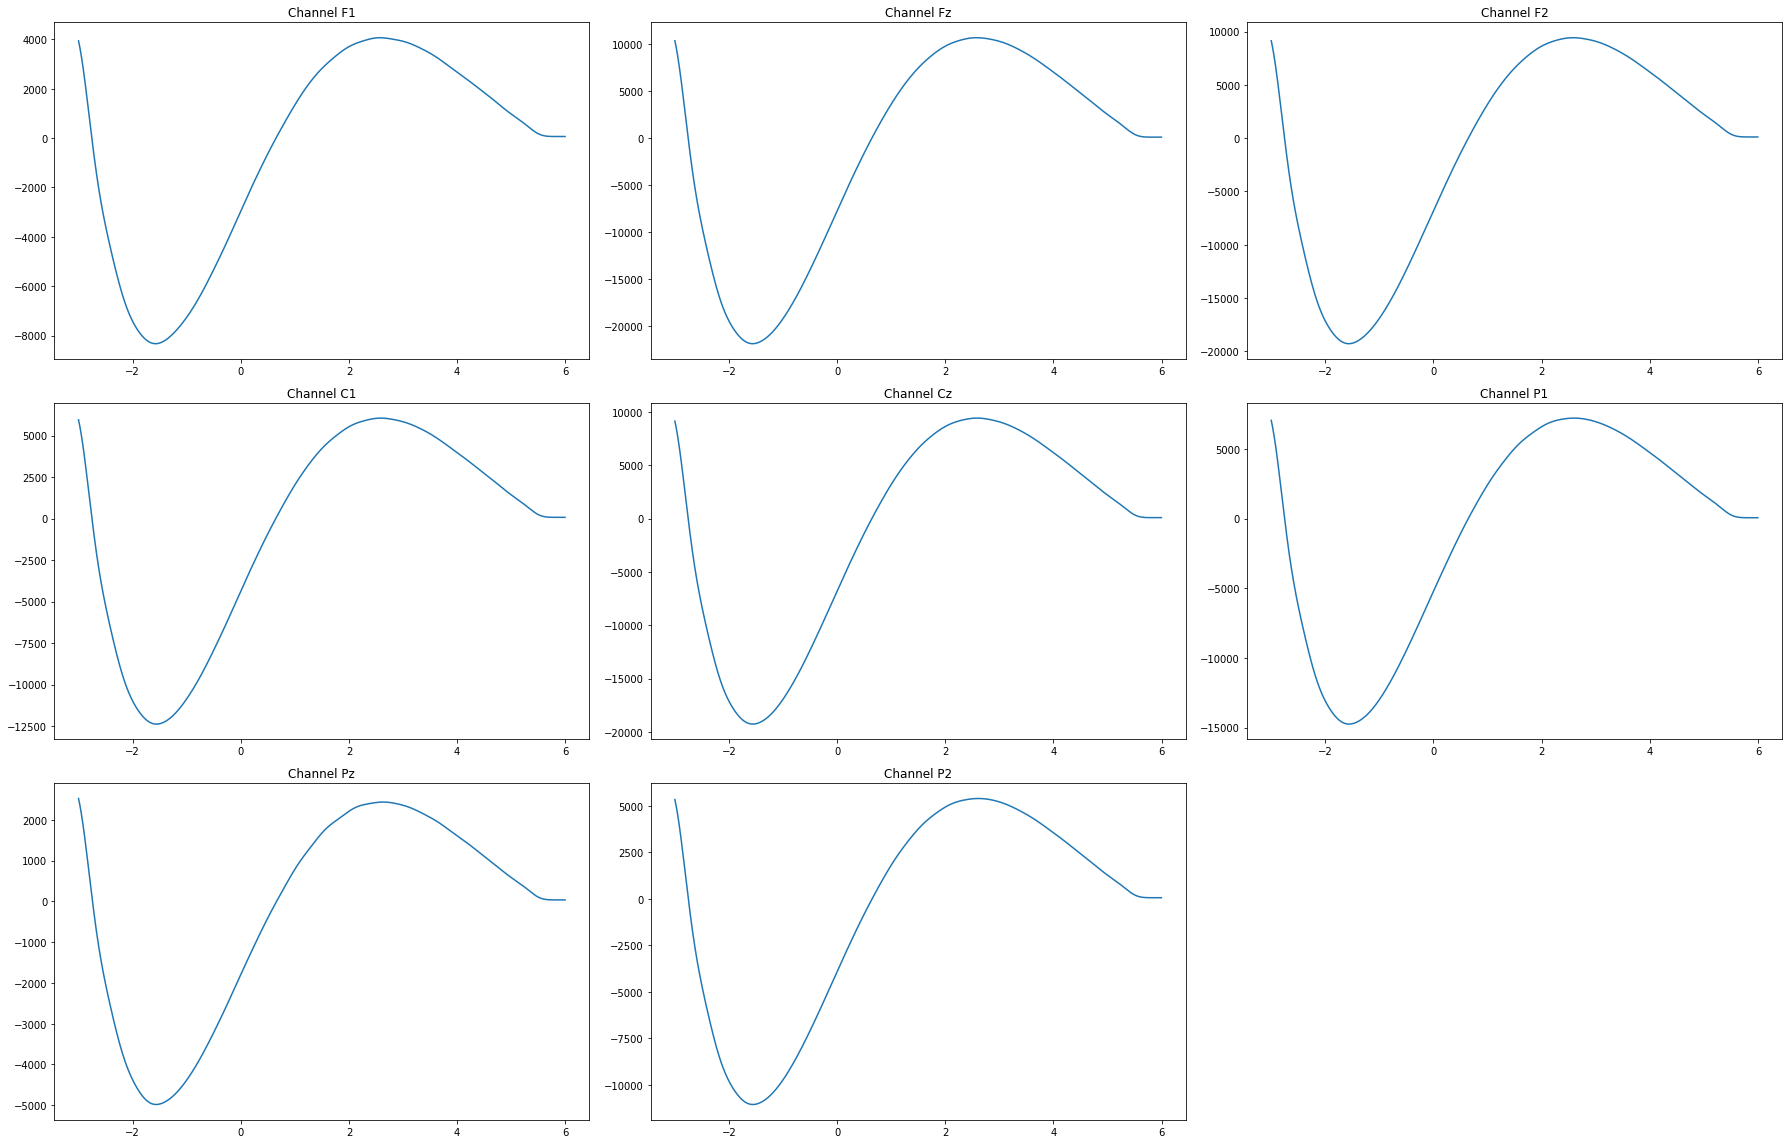

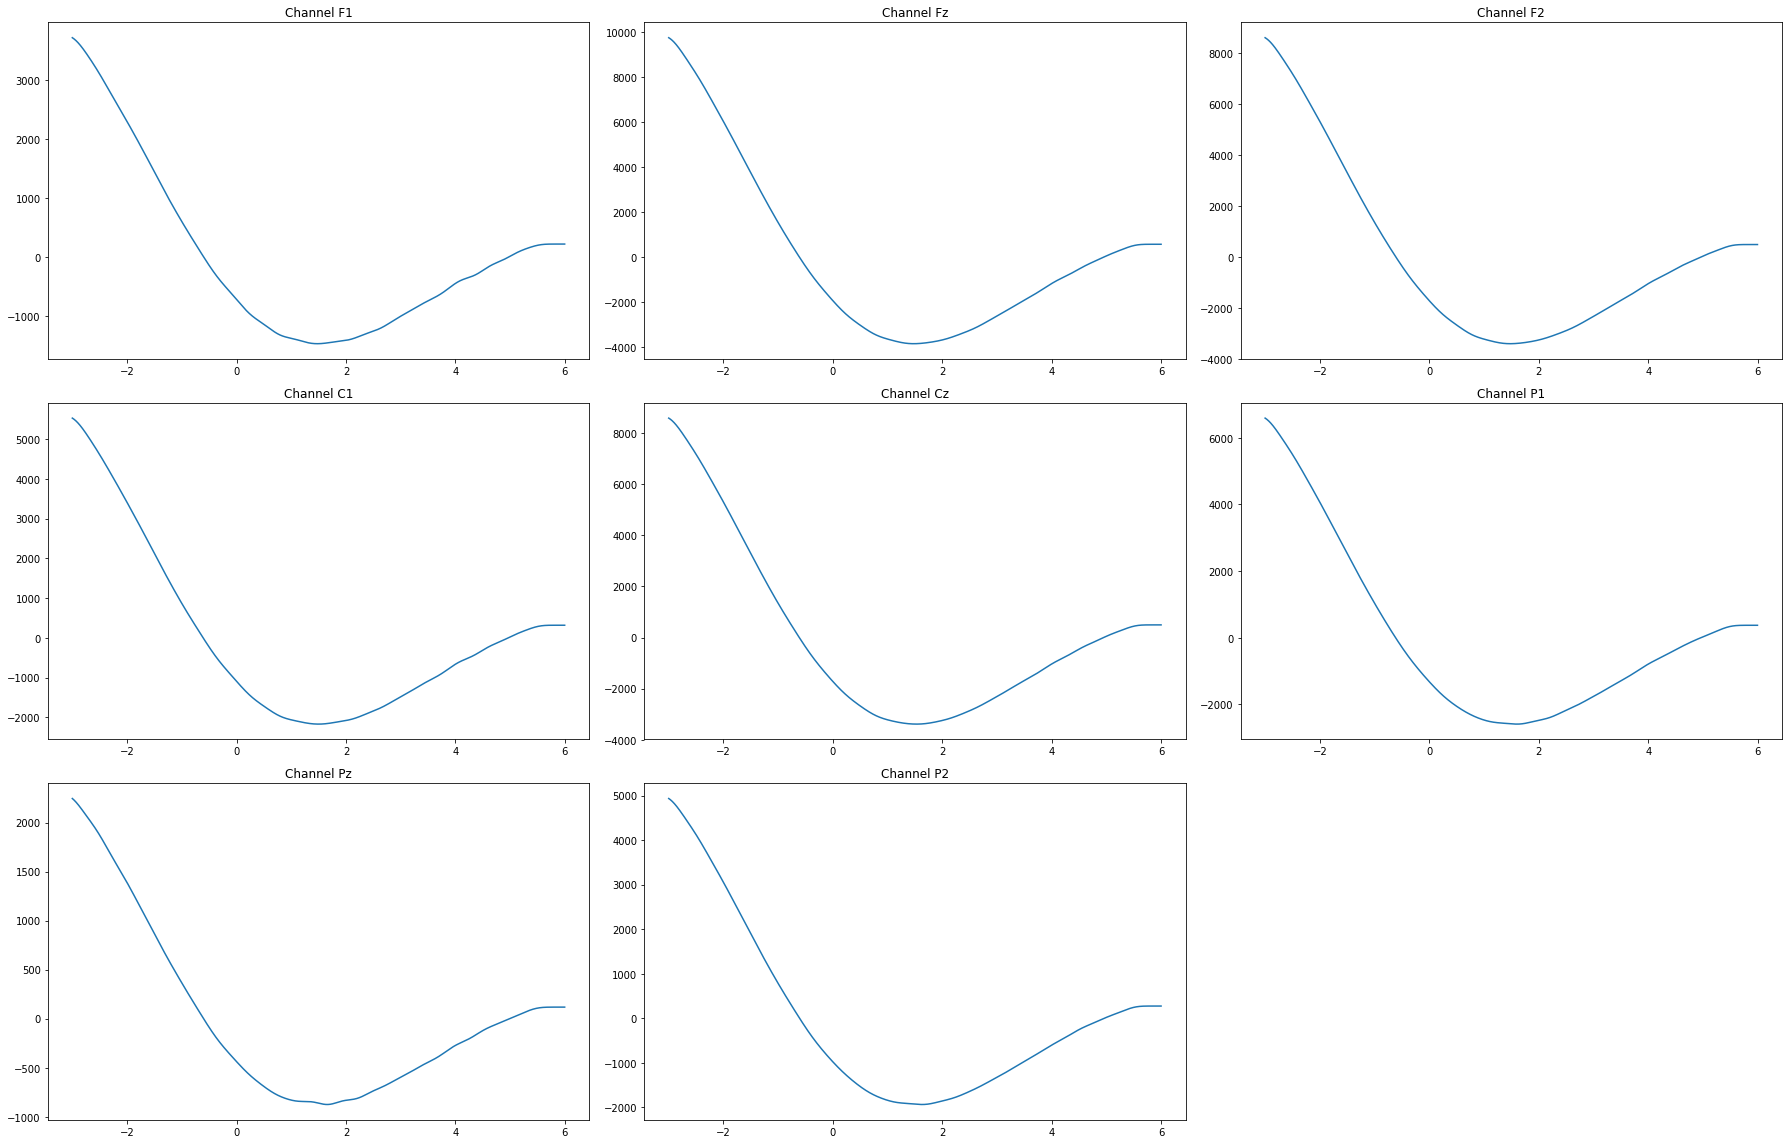

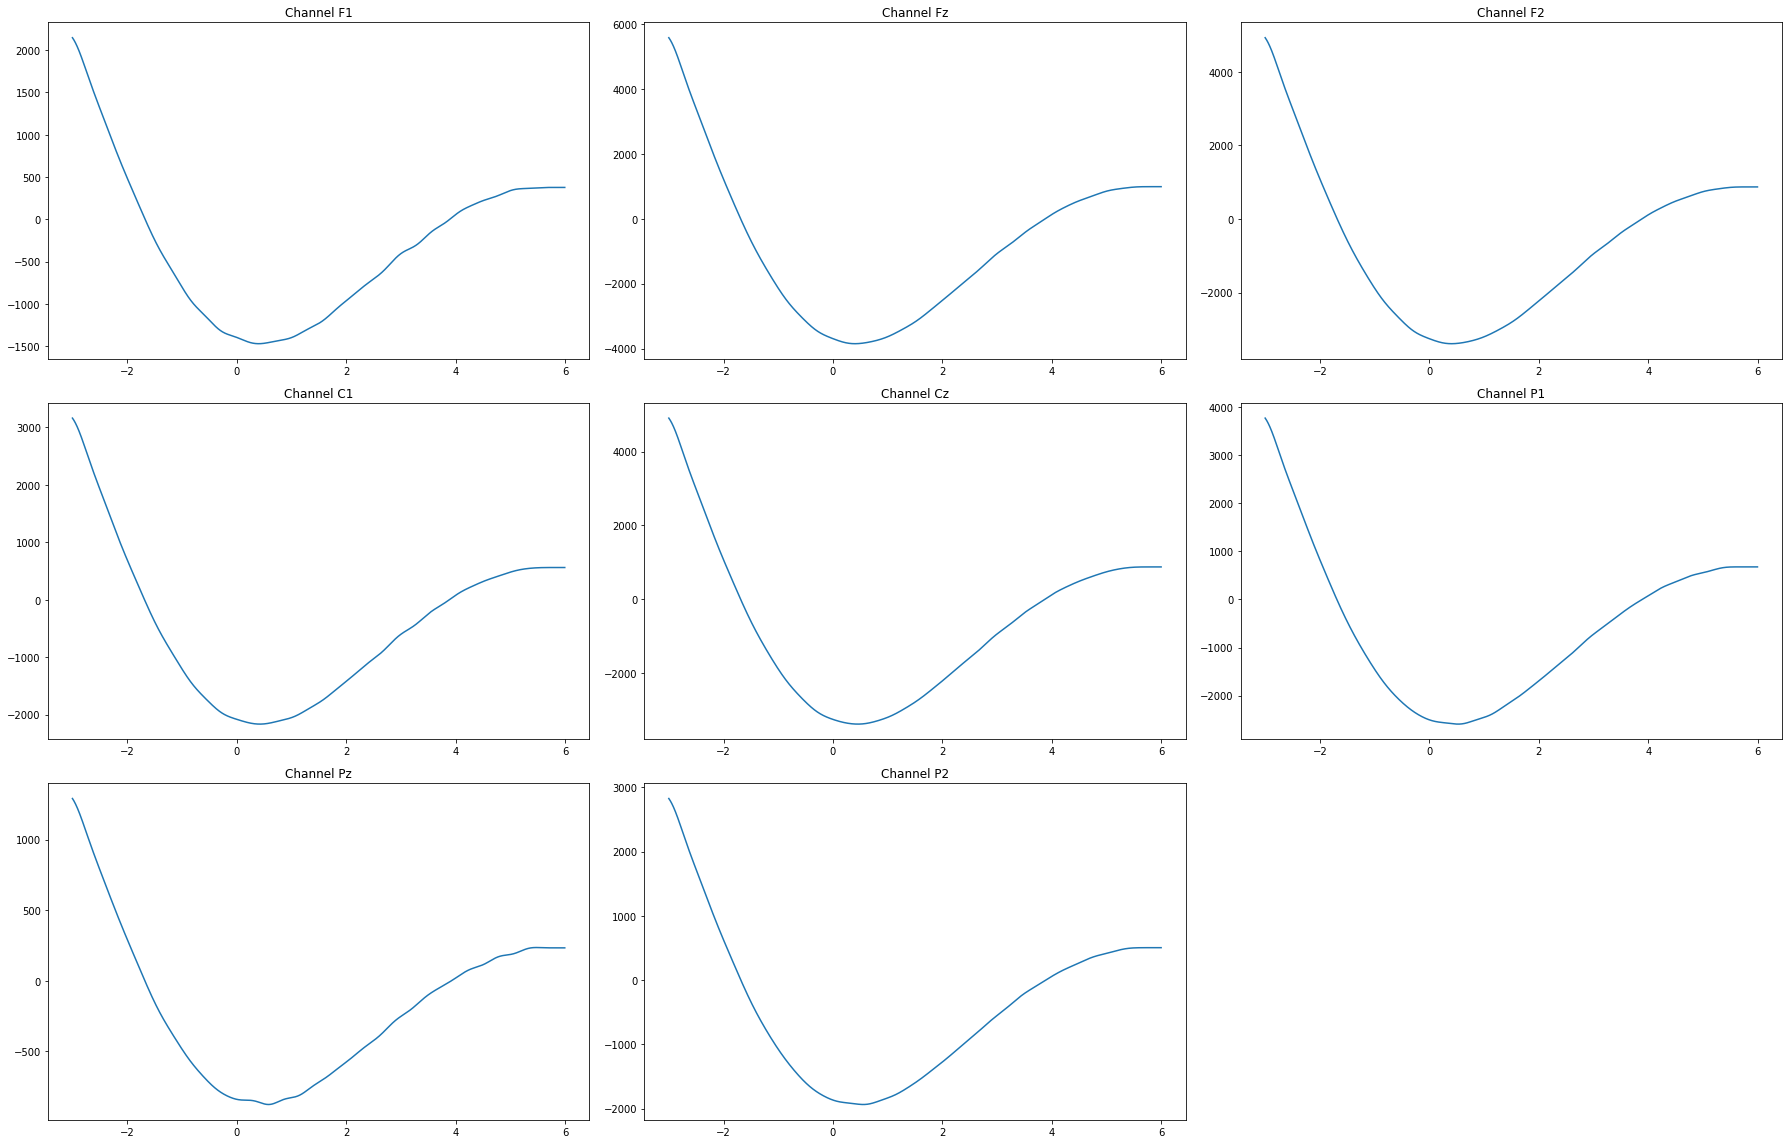

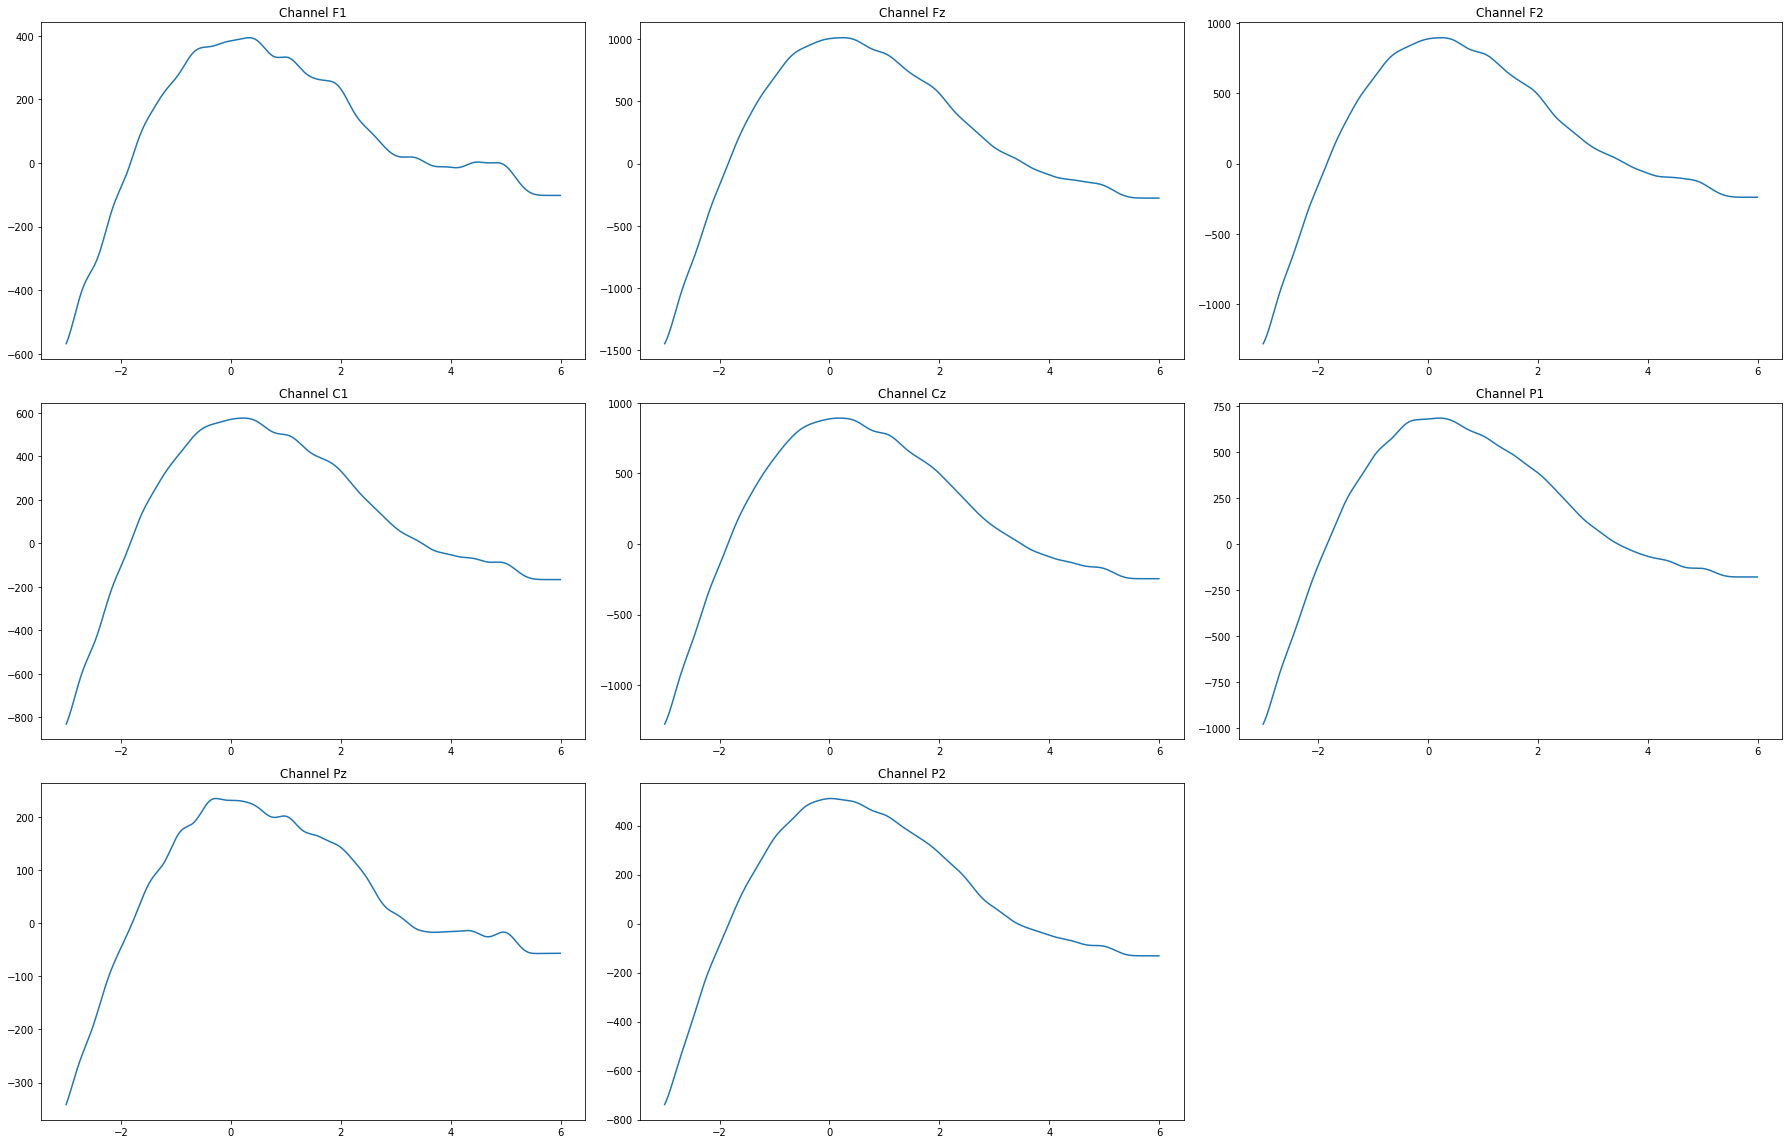

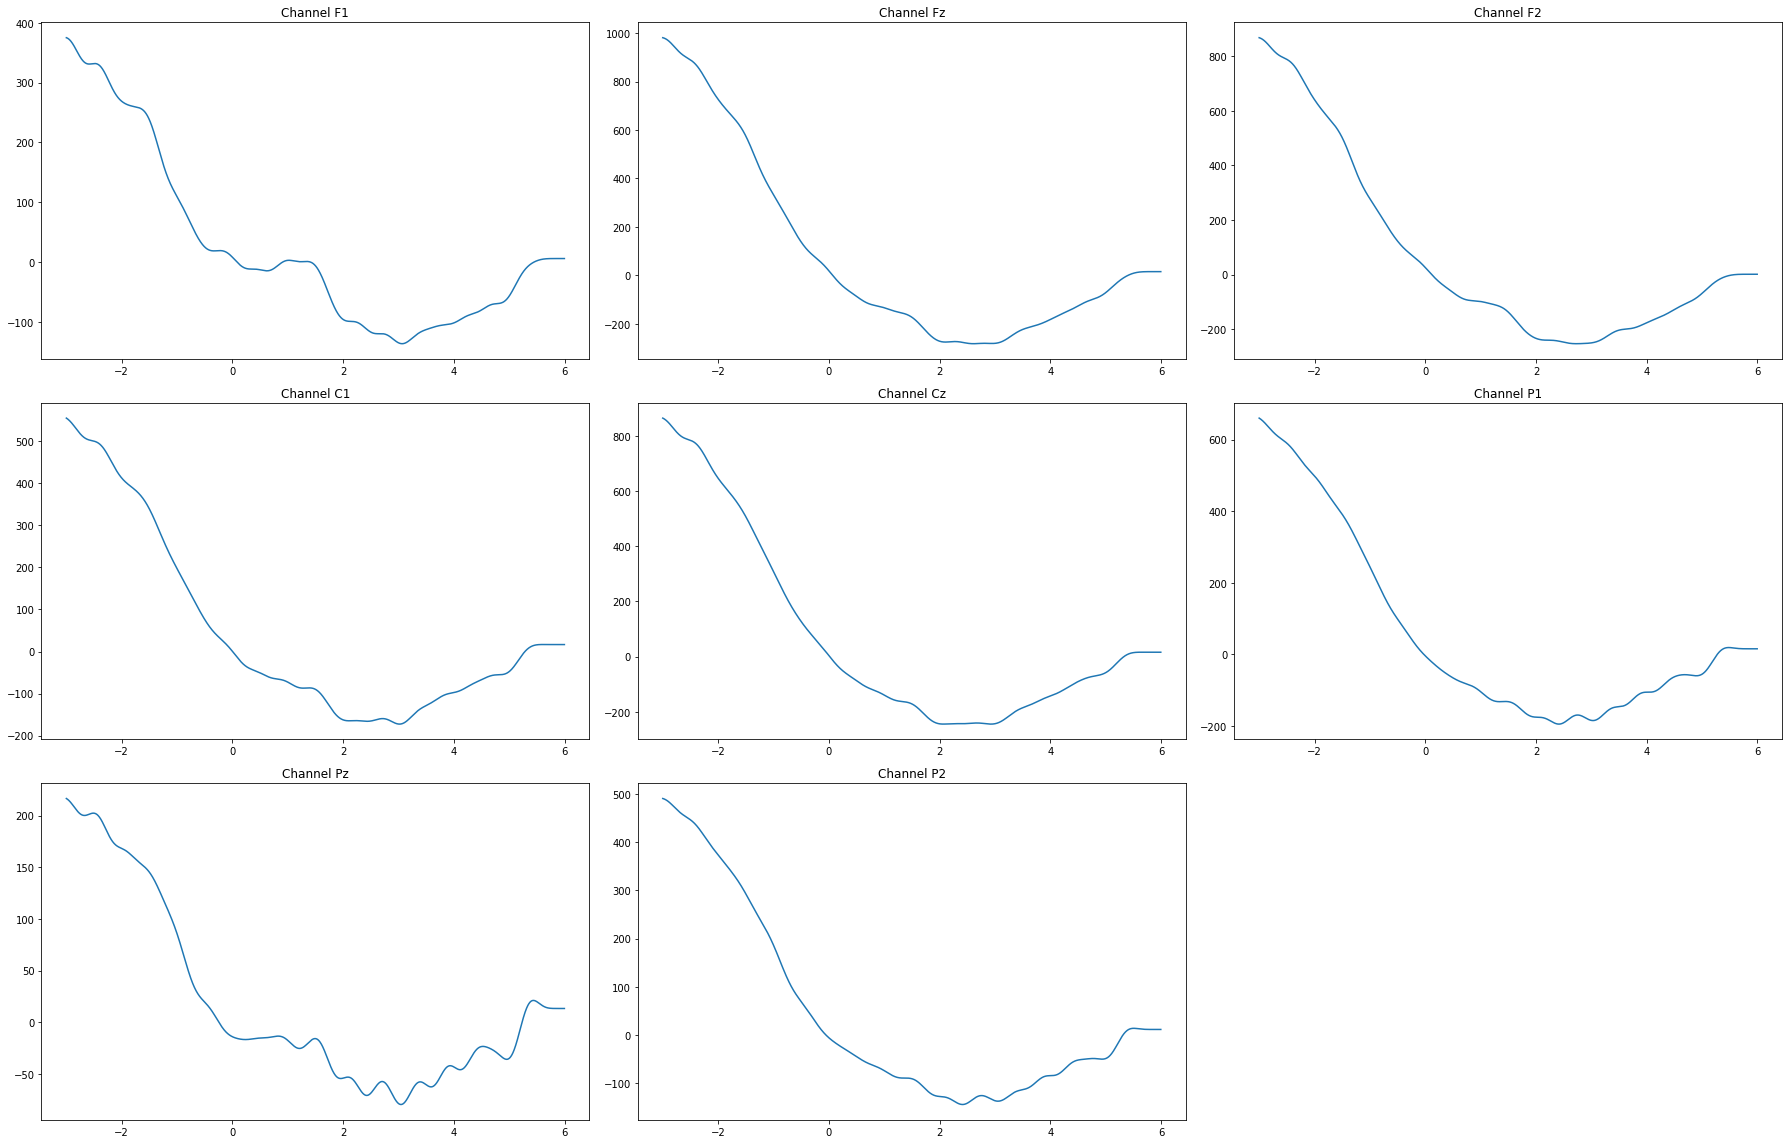

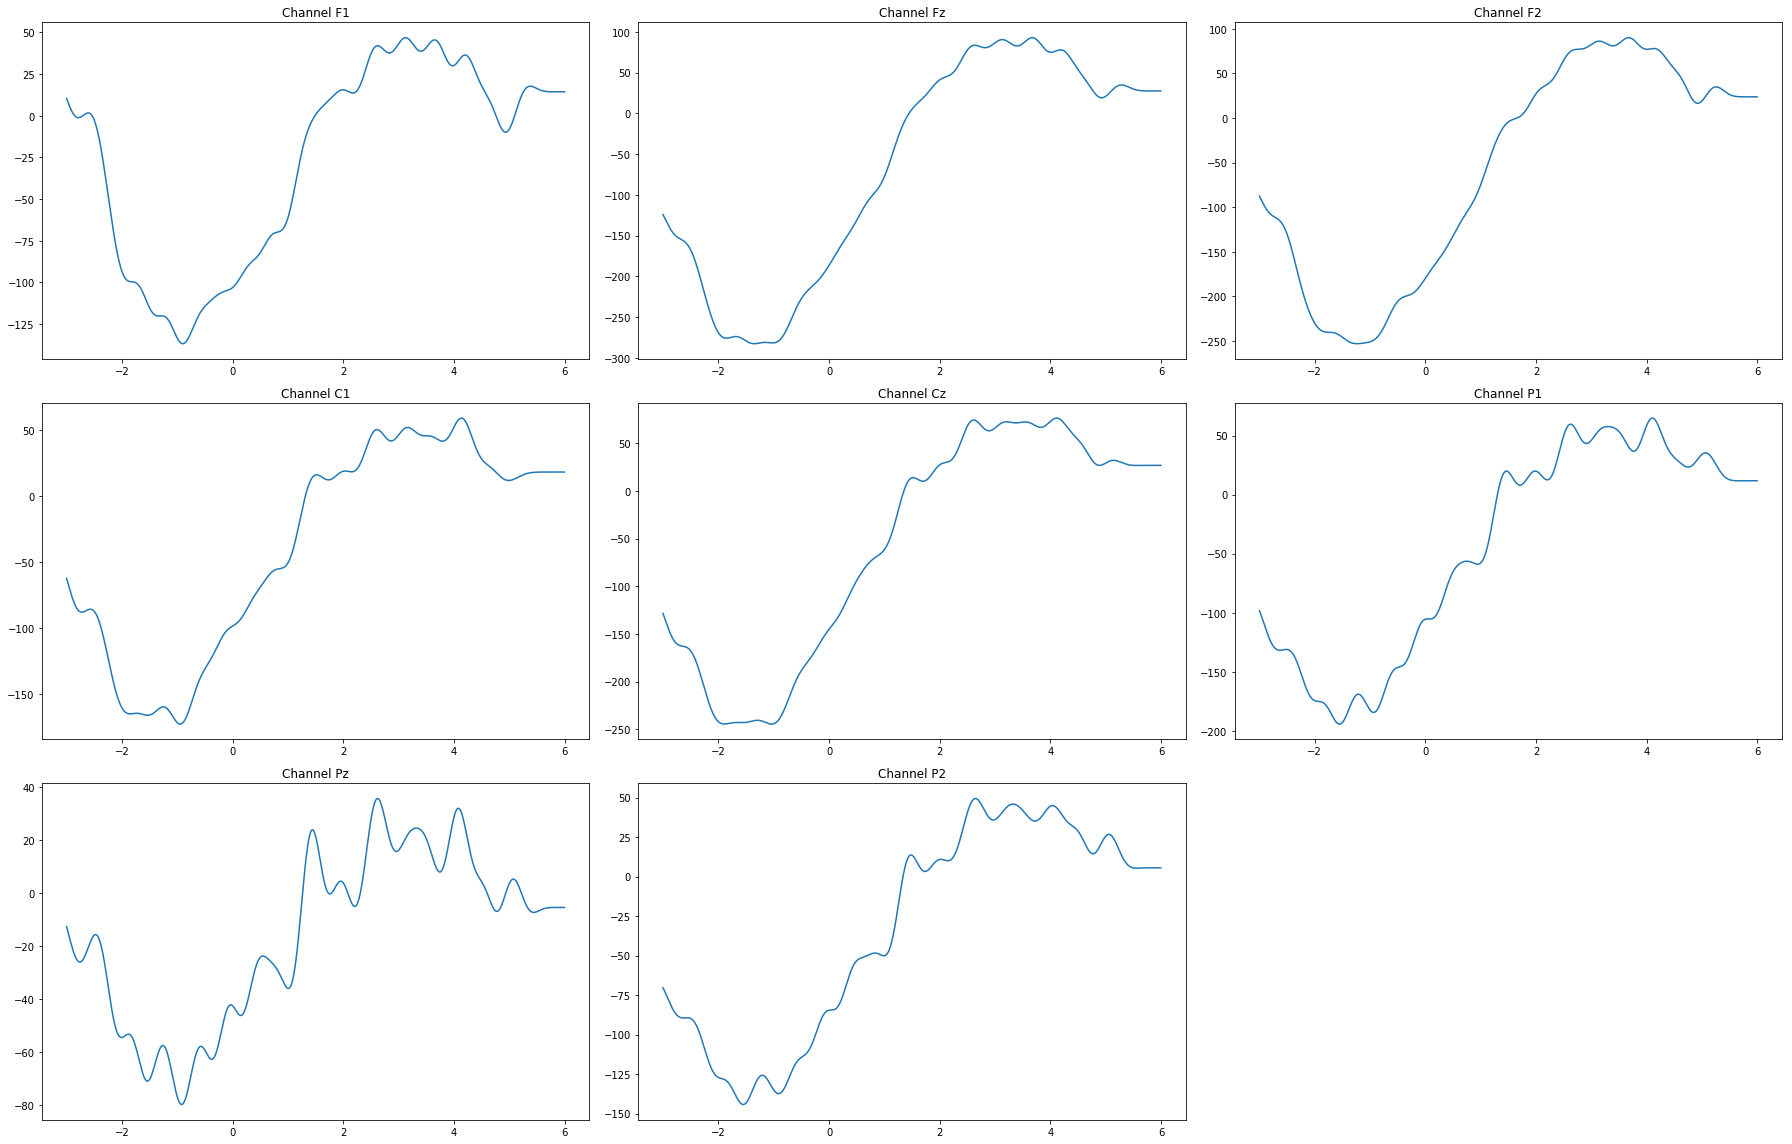

In [396]:
plt.rcParams["figure.figsize"] = [25,16]
m=6.0
for j in range(0, len(filtered[0])):
    activity='MI_15_'+str(j+1)
    fig = plt.figure()
    plot=fig.add_subplot(3,3,1)
    plt.plot(np.arange(-3.0, m, 1/256.0), filtered[0][j])
    plt.title('Channel F1')

    plot=fig.add_subplot(3,3,2)
    plt.plot(np.arange(-3.0, m, 1/256.0), filtered[1][j])
    plt.title('Channel Fz')

    plot=fig.add_subplot(3,3,3)
    plt.plot(np.arange(-3.0, m, 1/256.0), filtered[2][j])
    plt.title('Channel F2')

    plot=fig.add_subplot(3,3,4)
    plt.plot(np.arange(-3.0, m, 1/256.0), filtered[3][j])
    plt.title('Channel C1')


    plot=fig.add_subplot(3,3,5)
    plt.plot(np.arange(-3.0, m, 1/256.0), filtered[4][j])
    plt.title('Channel Cz')

    plot=fig.add_subplot(3,3,6)
    plt.plot(np.arange(-3.0, m, 1/256.0), filtered[5][j])
    plt.title('Channel P1')

    plot=fig.add_subplot(3,3,7)
    plt.plot(np.arange(-3.0, m, 1/256.0), filtered[6][j])
    plt.title('Channel Pz')

    plot=fig.add_subplot(3,3,8)
    plt.plot(np.arange(-3.0, m, 1/256.0), filtered[7][j])
    plt.title('Channel P2')

    plt.tight_layout()
    plt.savefig(path+'/'+activity+'.png')